# Section 1. Data Preprocessing & Cleaning

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import datetime as DT

bill_amount = pd.read_csv('bill_amount.csv')
bill_id = pd.read_csv('bill_id.csv')
clinical_data = pd.read_csv('clinical_data.csv')
demo = pd.read_csv('demographics.csv')

# Preprocessing & Cleaning of the demographics dataset

In [2]:
#checking for null values 
demo.isna().any()

patient_id         False
gender             False
race               False
resident_status    False
date_of_birth      False
dtype: bool

In [3]:
#convert to lowercase to reduce the number of groups from letters with different -cases. 
demo.gender = demo.gender.apply(lambda x: x.lower())

In [4]:
demo.race = demo.race.apply(lambda x: x.lower())

In [5]:
demo.resident_status = demo.resident_status.apply(lambda x: x.lower())

In [6]:
#Identifying errant/abnormal inputs for categorical variables within the demographics spreadsheet
demo.gender.value_counts()

female    1396
male      1333
m          170
f          101
Name: gender, dtype: int64

In [7]:
demo.race.value_counts()

chinese    1915
malay       629
indian      195
others      161
india       100
Name: race, dtype: int64

In [8]:
demo.resident_status.value_counts()

singaporean          1782
singapore citizen     610
pr                    465
foreigner             143
Name: resident_status, dtype: int64

By using the value_counts() attribute of the features as a Series, we identified that: 
1. for gender, we can combine m with male and f with female
2. for race, we can combine india with indian
3. for resident_status, we can combine singapore citizen with singaporean 

In [9]:
#Standardising male & female categorical variables to 'male' and 'female'
demo.gender = demo.gender.apply(lambda x: 'male' if x == 'm' else('female' if x == 'f' else (x)))

In [10]:
#Standardising 'indian' category for race 
demo.race = demo.race.apply(lambda x: 'indian' if x == 'india' else(x))

In [11]:
#Standardising 'singaporean' category for resident status because singapore citizens are singaporeans
demo.resident_status = demo.resident_status.apply(lambda x: 'singaporean' if x == 'singapore citizen' else(x))

In [12]:
demo = demo.set_index('patient_id')

# Preprocessing and cleaning clinical_data.csv
Completed preprocessing of the demographics dataset. From EDA of the clinical_data.csv, there are no features which are supposed to contain string formats besides patient ID. However, medical_history_3 contains Yes and No elements, which can be converted to 0 and 1. 

In [13]:
clinical_data.describe()

,medical_history_1,medical_history_2,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
count,3400.000000,3167.000000,3400.000000,3096.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,...,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,0.169118,0.311336,0.052059,0.063953,0.254706,0.254412,0.503824,0.591176,0.820882,0.523235,...,0.619706,0.662353,0.544706,0.726471,0.526765,14.469882,27.431529,99.489706,78.748441,165.084412
std,0.374911,0.463113,0.222178,0.244710,0.435760,0.435594,0.500059,0.491689,0.383507,0.499533,...,0.485530,0.472977,0.498071,0.445836,0.499357,1.747323,2.463844,15.254453,10.975076,6.973678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,52.000000,48.000000,151.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,25.800000,88.000000,71.200000,160.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,14.500000,27.400000,100.000000,78.900000,165.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,15.800000,29.100000,110.000000,86.300000,170.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,20.300000,35.100000,150.000000,121.000000,186.000000


In [14]:
clinical_data.isna().any()

id                    False
date_of_admission     False
date_of_discharge     False
medical_history_1     False
medical_history_2      True
medical_history_3     False
medical_history_4     False
medical_history_5      True
medical_history_6     False
medical_history_7     False
preop_medication_1    False
preop_medication_2    False
preop_medication_3    False
preop_medication_4    False
preop_medication_5    False
preop_medication_6    False
symptom_1             False
symptom_2             False
symptom_3             False
symptom_4             False
symptom_5             False
lab_result_1          False
lab_result_2          False
lab_result_3          False
weight                False
height                False
dtype: bool

Features medical_history_2 and medical_history_5 have null values. These null values will be replaced with the median values of the respective columns. 

In [15]:
clinical_data = clinical_data.sort_values(['id', 'date_of_admission'])

In [16]:
#Removing duplicated patient id samples from the spreadsheet to simplify the analysis 
cd_dup = clinical_data[[not i for i in clinical_data.duplicated(subset = ['id'])]]

In [17]:
cd_dup.medical_history_2.median()

0.0

In [18]:
cd_dup.medical_history_5.median()

0.0

In [19]:
#Handling NaN values. Since the medians for medical_history_2 and 5 are both 0, we can simply replace all null values with 0. 
#Note: Null values in datasets are usually not this easy to handle.  
cd_dup = cd_dup.fillna(value = 0)

In [20]:
#Handling categorical mislabelling. We replace 'Yes' with 1 and 'No' with 0 for medical_history_3.
cd_dup.medical_history_3 = cd_dup.medical_history_3.apply(lambda x: x if type(x) == int else (1 if x == 'Yes' else (0)))

In [21]:
cd_dup.medical_history_2 = cd_dup.medical_history_2.astype('int64')
cd_dup.medical_history_5 = cd_dup.medical_history_5.astype('int64')

In [22]:
cd_dup = cd_dup.set_index('id')

# Preprocessing and cleaning bill_id.csv and bill_amount.csv

In [23]:
bill_id.head()

,bill_id,patient_id,date_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01


In [24]:
bill_amount.head(10)

,bill_id,amount
0,40315104,1552.634830
1,2660045161,1032.011951
2,1148334643,6469.605351
3,3818426276,755.965425
4,9833541918,897.347816
5,620763456,1027.316873
6,8769910680,1039.084883
7,1726639695,654.969748
8,5493467321,646.704056
9,4661888038,1304.195654


In [25]:
bill_amount.describe()

,bill_id,amount
count,1.360000e+04,13600.000000
mean,5.007147e+09,5464.767783
std,2.885919e+09,7717.479509
min,5.584120e+05,79.496707
25%,2.485853e+09,950.689008
50%,4.992958e+09,1516.951136
75%,7.524563e+09,7307.056573
max,9.999633e+09,81849.751340


In [26]:
#Checking for null values, 
bill_id.isna().any()

bill_id              False
patient_id           False
date_of_admission    False
dtype: bool

In [27]:
bill_amount.isna().any()

bill_id    False
amount     False
dtype: bool

In [28]:
#patient_id is encoded but the presence of integers may cause certain compilers to read it as an integer and cause format mismatch
#errors. As such, patient_id was converted to string to avoid this issue with merging. 
bill_id['patient_id'] = bill_id.patient_id.astype(str)

In [29]:
bill = pd.merge(bill_id, bill_amount, on = 'bill_id')

In [30]:
bill = bill.drop('bill_id', axis =1 )

In [31]:
#Summing up bills from the 4 separate bill_id for each patient_id and date_of_admission
bg = bill.groupby(['patient_id', 'date_of_admission']).amount.sum()

In [32]:
bg.describe()

count     3400.000000
mean     21859.071130
std      10155.336753
min       2946.100354
25%      14793.370831
50%      20180.020614
75%      26680.292435
max      98723.854994
Name: amount, dtype: float64

In [33]:
bg_ri = bg.reset_index()

In [34]:
#Simplifying the model by taking only the first admission for each patient _id
bg_first = bg_ri[[not i for i in bg_ri.duplicated(subset = 'patient_id')]]

In [35]:
bg_first = bg_first.set_index('patient_id')

# Merging clinical_data and demographic for a more comprehensive dataset for patient information. 
Demographic and clinical_data were merged together first in order to link the patient's demographical information to their clinical data. From this joined dataset, we can also determine the age of the patient by subtracting their Date Of Birth from their Date of Admission.  

In [36]:
joined = cd_dup.merge(demo, left_index = True, right_index = True)

Feature engineering for the given dataset. The inpatient duration is potentially more relevant than the dates of admission & discharge themselves. As such, we engineer a new feature, inpatient duration, which would be the difference in days between discharge & admission. In addition, we engineer a new feature Year from the date of admission. This would allow us to conduct an analysis based on the year of patient admission. 

In [37]:
joined.date_of_admission = joined.date_of_admission.astype('datetime64')
joined.date_of_discharge = joined.date_of_discharge.astype('datetime64')
joined.date_of_birth = joined.date_of_birth.astype('datetime64')

In [38]:
joined['Year'] = joined.date_of_admission.dt.year

In [39]:
joined['Age'] = joined.date_of_admission.dt.year - joined.date_of_birth.dt.year

In [40]:
joined['Inpatient_D'] = (joined.date_of_discharge - joined.date_of_admission).dt.days

A new feature, Body Mass Index(BMI) can also be generated from the height and weight data, following the formula BMI = weight/(height^2). 

In [41]:
joined['BMI'] = (joined.weight/(joined.height*cd_dup.height) * 10000)

The 3 categorical variables; medical history, preop medication and symptom can also be engineered. Besides their presence, we can also sum the total number of medical history or medication prescribed or symptoms exhibited by each patient. This might be more clinically relevant to cost, as the higher the number of comorbidity, treatment costs will usually be more expensive as more treatments need to performed or prescribed to the patient. 

In [42]:
joined['N_Hist'] = joined.medical_history_1 + joined.medical_history_2 + joined.medical_history_3 + cd_dup.medical_history_4 + joined.medical_history_5 + joined.medical_history_6 + joined.medical_history_7  

In [43]:
joined['N_Med'] = joined.preop_medication_1 + joined.preop_medication_2 + joined.preop_medication_3 + joined.preop_medication_4 + joined.preop_medication_5 

In [44]:
joined['N_Symp'] = joined.symptom_1 + joined.symptom_2 + joined.symptom_3 + joined.symptom_4 + joined.symptom_5 

In [45]:
joined = joined.drop(['date_of_discharge', 'weight', 'height','date_of_birth'], axis =1)

In [46]:
#merge the joined dataset(which merges clinical_data & demographics) and the bg_first dataset(which merges bill_amount & bill_id)
merged = joined.merge(bg_first, left_index = True, right_index = True)

In [47]:
merged = merged.drop(['date_of_admission_x', 'date_of_admission_y'], axis = 1)

In [48]:
#Removal of outliers for continuous variables. 
#Choose samples which lie within 3 standard deviations from the mean of normalized variables to preserve sample numbers 
import scipy as sp

numerical_columns = ['amount', 'Inpatient_D', 'BMI', 'lab_result_1', 'lab_result_2', 'lab_result_3']
merged_or = merged[(np.abs(sp.stats.zscore(merged[numerical_columns])) < 3).all(axis=1)]

In [49]:
merged_or.describe()

,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,...,lab_result_2,lab_result_3,Year,Age,Inpatient_D,BMI,N_Hist,N_Med,N_Symp,amount
count,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,...,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000
mean,0.162862,0.287564,0.034753,0.052129,0.058944,0.247359,0.256218,0.500170,0.587734,0.818399,...,27.442624,99.617036,2012.904940,52.240886,11.081090,28.887756,1.099830,3.246678,3.062351,21232.128352
std,0.369303,0.452704,0.183185,0.222326,0.235560,0.431551,0.436618,0.500085,0.492326,0.385581,...,2.452304,15.119199,1.416438,14.600365,2.832323,4.070715,0.916365,1.030781,1.073570,8826.831861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.100000,57.000000,2011.000000,22.000000,3.000000,17.508651,0.000000,0.000000,0.000000,2946.100354
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,25.800000,88.000000,2012.000000,39.000000,9.000000,26.154824,0.000000,3.000000,2.000000,14579.626555
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,27.400000,100.000000,2013.000000,50.000000,11.000000,28.870523,1.000000,3.000000,3.000000,19933.214177
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,29.200000,110.000000,2014.000000,65.000000,13.000000,31.601591,2.000000,4.000000,4.000000,26479.242239
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,34.500000,143.000000,2015.000000,85.000000,19.000000,40.945291,4.000000,5.000000,5.000000,52224.523780


# Section 2. Exploratory Data Analysis 


# Univariate Data Analysis - Distribution and Descriptive Statistics of Cost

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


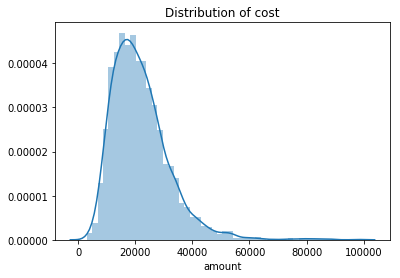

In [50]:
#The distribution function of the the cost of healthcare in the dataset was plotted out. The figure below shows the 
#distribution function before outlier removal. 
distPlot = sns.distplot(merged['amount'])
plt.title("Distribution of cost")
plt.show()

In [51]:
merged.amount.describe()

count     3000.000000
mean     21798.335703
std      10161.000119
min       2946.100354
25%      14665.890997
50%      20101.522184
75%      26733.192619
max      98120.870207
Name: amount, dtype: float64

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


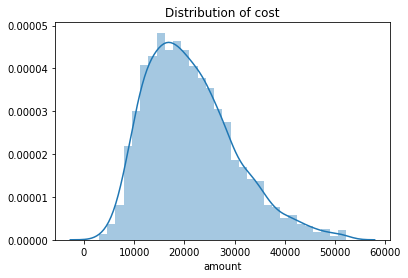

In [52]:
#The max amount is 98120, which is far above the mean amount. These outliers caused the distribution function to be skewed
#Below shows the distribution function for the dataset with removed outliers. 
distPlot = sns.distplot(merged_or['amount'])
plt.title("Distribution of cost")
plt.show()

In [53]:
merged_or.amount.describe()
#The maximum amount is now 52224. 

count     2935.000000
mean     21232.128352
std       8826.831861
min       2946.100354
25%      14579.626555
50%      19933.214177
75%      26479.242239
max      52224.523780
Name: amount, dtype: float64

# Univariate Data Analysis - Distribution and Descriptive Statistics of Inpatient Duration

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


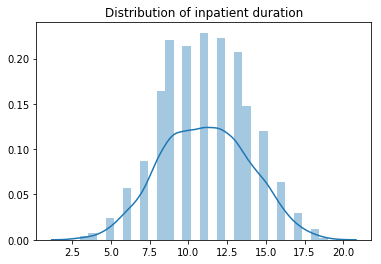

In [58]:
distPlot_inD = sns.distplot(merged_or['Inpatient_D'], axlabel = False)
plt.title("Distribution of inpatient duration")
plt.show()

In [59]:
merged_or.inpatient_D.describe()

AttributeError: 'DataFrame' object has no attribute 'inpatient_D'

# Univariate Data Analysis - Distribution and Descriptive Statistics of BMI

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


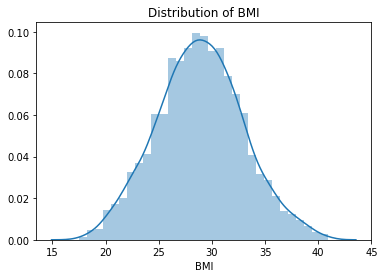

In [60]:
distPlot_bmi = sns.distplot(merged_or['BMI'])
plt.title("Distribution of BMI")
plt.show()

In [61]:
merged_or.BMI.describe()

count    2935.000000
mean       28.887756
std         4.070715
min        17.508651
25%        26.154824
50%        28.870523
75%        31.601591
max        40.945291
Name: BMI, dtype: float64

# Univariate Data Analysis - Distribution and Descriptive Statistics of Pre-op medications prescribed

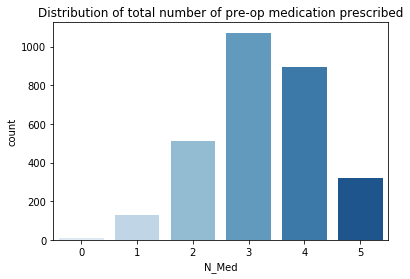

In [62]:
distPlot_N_med = sns.countplot(merged_or['N_Med'], palette = 'Blues')
plt.title("Distribution of total number of pre-op medication prescribed")
plt.show()

From the countplots obtained for all the preop_medications, we can observe that preop_medication_3 and preop_medication_5 are prescribed to patients more frequently than the rest. These two medications could be common medications. 

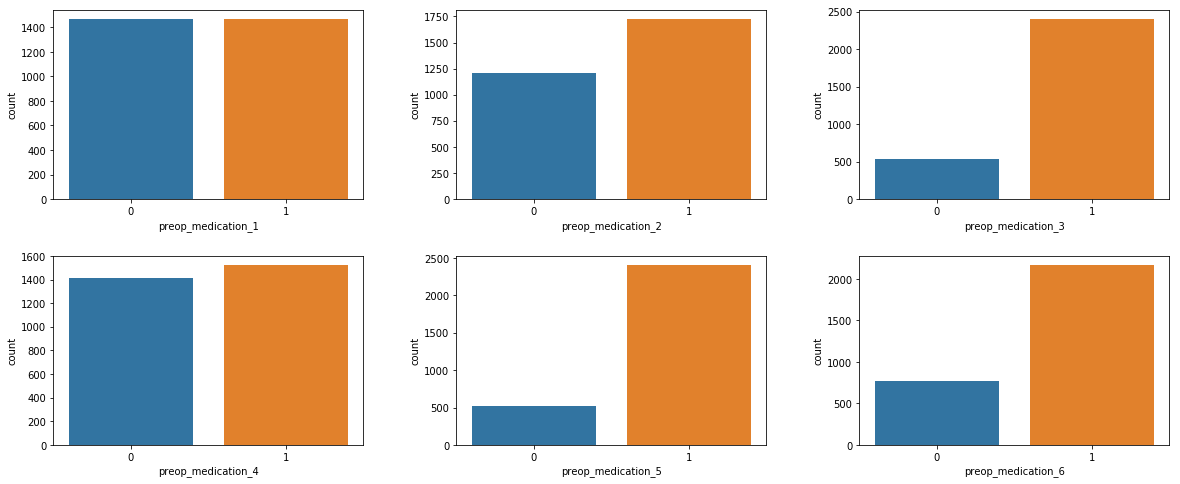

In [63]:
fig, ax = plt.subplots(figsize = (20, 8))

ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))
ax6 = plt.subplot2grid((2, 3), (1, 2))

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

sns.countplot(merged_or["preop_medication_1"],  ax = ax1)
sns.countplot(merged_or["preop_medication_2"],  ax = ax2)
sns.countplot(merged_or["preop_medication_3"],  ax = ax3)
sns.countplot(merged_or["preop_medication_4"],  ax = ax4)
sns.countplot(merged_or["preop_medication_5"],  ax = ax5)
sns.countplot(merged_or["preop_medication_6"],  ax = ax6)

# Univariate Data Analysis - Distribution and Descriptive Statistics of Symptoms

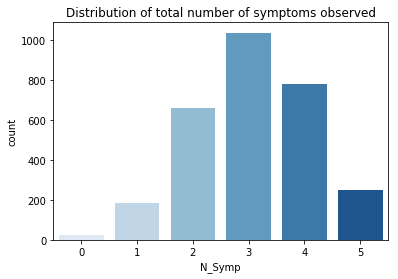

In [64]:
distPlot_N_Symp = sns.countplot(merged_or['N_Symp'], palette = 'Blues')
plt.title("Distribution of total number of symptoms observed")
plt.show()

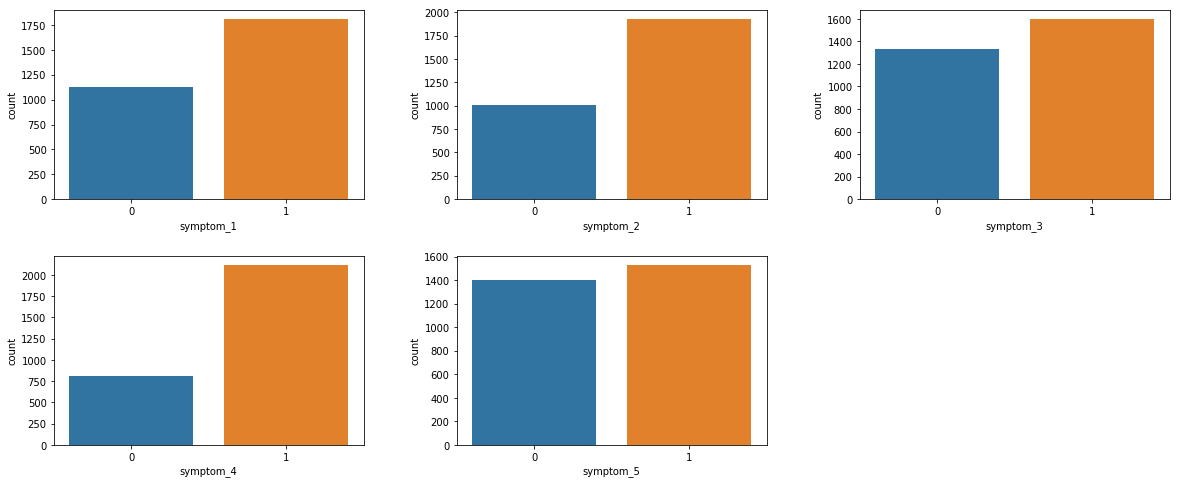

In [65]:
fig, ax = plt.subplots(figsize = (20, 8))

ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

sns.countplot(merged_or["symptom_1"],  ax = ax1)
sns.countplot(merged_or["symptom_2"],  ax = ax2)
sns.countplot(merged_or["symptom_3"],  ax = ax3)
sns.countplot(merged_or["symptom_4"],  ax = ax4)
sns.countplot(merged_or["symptom_5"],  ax = ax5)

# Univariate Data Analysis - Distribution and Descriptive Statistics of Medical History

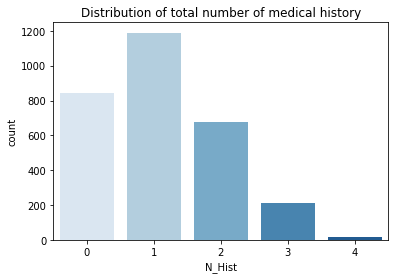

In [66]:
distPlot_N_Hist = sns.countplot(merged_or['N_Hist'], palette = 'Blues')
plt.title("Distribution of total number of medical history")
plt.show()

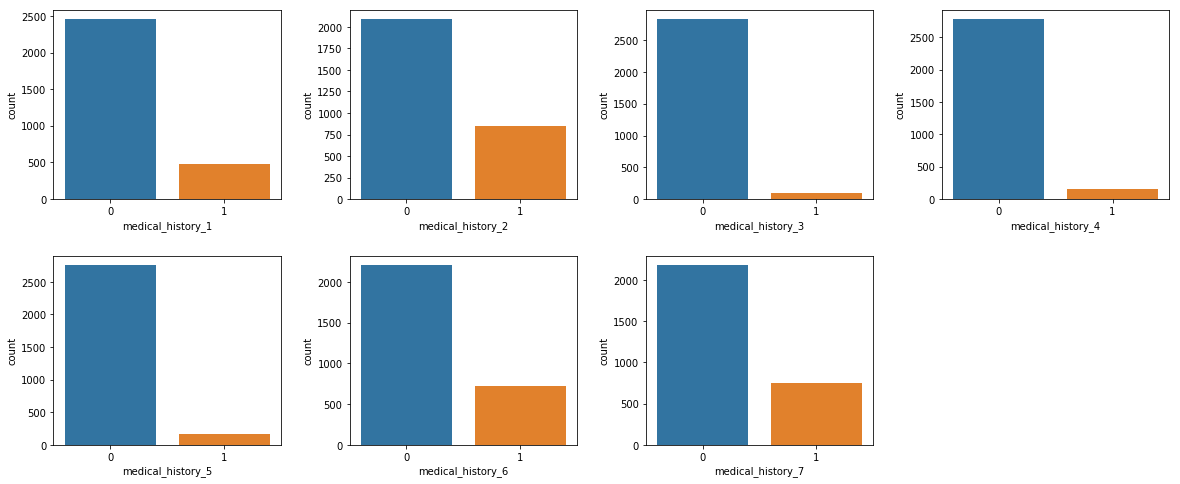

In [67]:
fig, ax = plt.subplots(figsize = (20, 8))

ax1 = plt.subplot2grid((2, 4), (0, 0))
ax2 = plt.subplot2grid((2, 4), (0, 1))
ax3 = plt.subplot2grid((2, 4), (0, 2))
ax4 = plt.subplot2grid((2, 4), (0, 3))
ax5 = plt.subplot2grid((2, 4), (1, 0))
ax6 = plt.subplot2grid((2, 4), (1, 1))
ax7 = plt.subplot2grid((2, 4), (1, 2))

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

sns.countplot(merged_or["medical_history_1"],  ax = ax1)
sns.countplot(merged_or["medical_history_2"],  ax = ax2)
sns.countplot(merged_or["medical_history_3"],  ax = ax3)
sns.countplot(merged_or["medical_history_4"],  ax = ax4)
sns.countplot(merged_or["medical_history_5"],  ax = ax5)
sns.countplot(merged_or["medical_history_6"],  ax = ax6)
sns.countplot(merged_or["medical_history_7"],  ax = ax7)

# Univariate Data Analysis - Distribution and Descriptive Statistics of 3 different Lab Results 

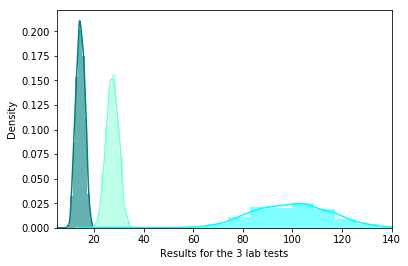

In [68]:
ax = merged_or['lab_result_1'].hist(density=True, stacked=True, color='teal', alpha=0.6)
merged_or['lab_result_1'].plot(kind='density', color='teal')
ax = merged_or['lab_result_2'].hist(density=True, stacked=True, color='aquamarine', alpha=0.5)
merged_or['lab_result_2'].plot(kind='density', color='aquamarine')
ax = merged_or['lab_result_3'].hist(density=True, stacked=True, color='aqua', alpha=0.5)
merged_or['lab_result_3'].plot(kind='density', color='aqua')
ax.set(xlabel='Results for the 3 lab tests')
plt.xlim(5, 140)
plt.show()
#Most likely the 3 tests are different

# Bivariate Data Analysis - Gender, Race and Resident Status vs Cost 

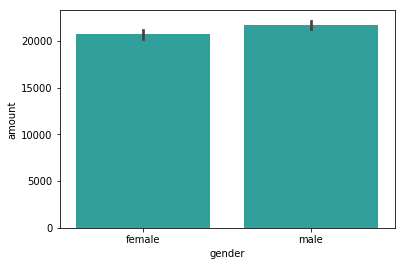

In [69]:
#The equal barplots show that there diffferences in cost due to gender may not be significant. 
sns.barplot('gender', 'amount', data=merged_or, color="lightseagreen")

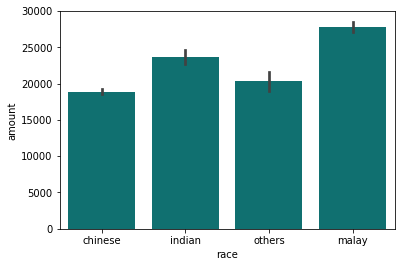

In [70]:
#The barplot shown below indicates that Malays tend to incur higher costs of healthcare. 
sns.barplot('race', 'amount', data=merged_or, color="teal")

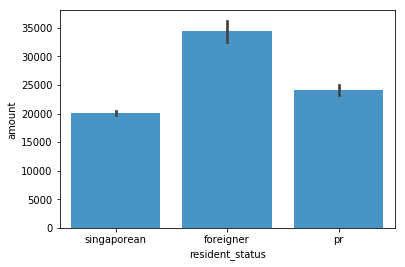

In [71]:
#Additionally, foreigners show significantly higher cost of healthcare incurred as compared to Singaporeans or PR. 
sns.barplot('resident_status', 'amount', data=merged_or, color="#3498db")

In [72]:
merged_or = merged_or.reset_index()

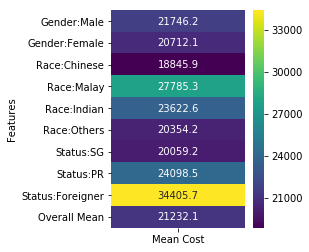

In [73]:
u_male = merged_or[merged_or.gender == 'male'].amount.mean()
u_female = merged_or[merged_or.gender == 'female'].amount.mean()
u_chin = merged_or[merged_or.race == 'chinese'].amount.mean()
u_malay = merged_or[merged_or.race == 'malay'].amount.mean()
u_india = merged_or[merged_or.race == 'indian'].amount.mean()
u_others = merged_or[merged_or.race == 'others'].amount.mean()
u_sg = merged_or[merged_or.resident_status == 'singaporean'].amount.mean()
u_pr = merged_or[merged_or.resident_status == 'pr'].amount.mean()
u_for = merged_or[merged_or.resident_status == 'foreigner'].amount.mean()
u_mean = merged_or.amount.mean()

index_labels = ['Gender:Male','Gender:Female', 'Race:Chinese', 'Race:Malay','Race:Indian','Race:Others','Status:SG', 'Status:PR', 'Status:Foreigner', 'Overall Mean']
means = [u_male,u_female, u_chin, u_malay, u_india, u_others, u_sg, u_pr, u_for, u_mean ]
m_s = list(zip(index_labels, means))

MS = pd.DataFrame.from_records(m_s, columns = ['Features', 'Mean Cost']).set_index('Features').round(2)
fig, ax = plt.subplots(figsize = (3, 4))
sns.heatmap(MS, annot = True, fmt = 'g', cmap = 'viridis')


From the three categorical variables analysed, we observed that the mean cost for the Indian and Malay race as well as Foreigners is higher than the overall mean. This implies that these categories could be indicative of high cost of care

# Bivariate Data Analysis- Inpatient Duration vs Cost

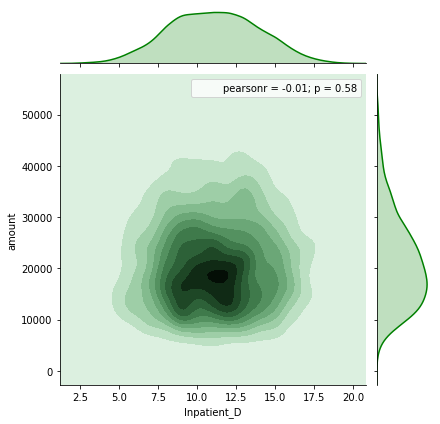

In [75]:
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, as_cmap = True)
sns.jointplot('Inpatient_D', 'amount', data=merged_or, kind = 'kde', cmap = cmap, color = 'g')

# Bivariate Data Analysis- BMI vs Cost

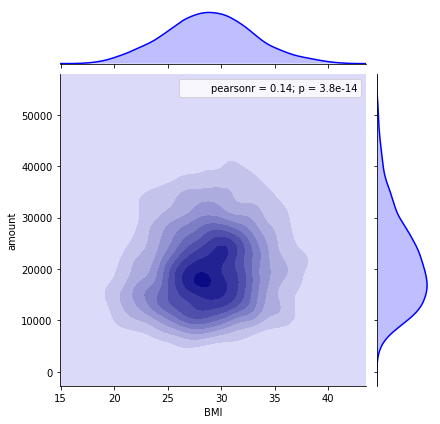

In [76]:
cmap = sns.light_palette("navy", as_cmap = True)
sns.jointplot('BMI', 'amount', data=merged_or, kind = 'kde', cmap = cmap, color="blue")

# Bivariate Data Analysis- Age vs Cost

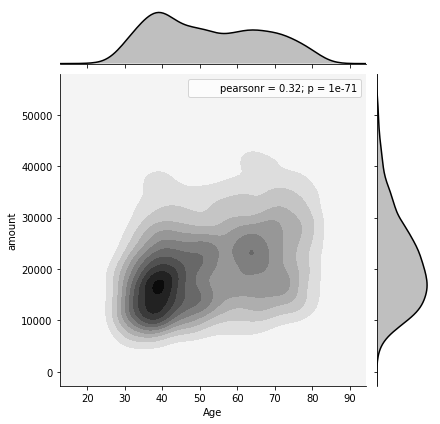

In [77]:
sns.jointplot('Age', 'amount', data=merged_or, kind = 'kde', color="k")

# Bivariate Data Analysis- Lab results 1, 2, 3  vs Cost

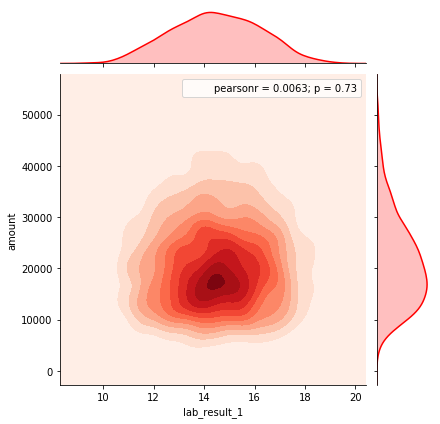

In [78]:
sns.jointplot('lab_result_1', 'amount', data=merged_or, kind = 'kde', cmap="Reds", color = 'r')

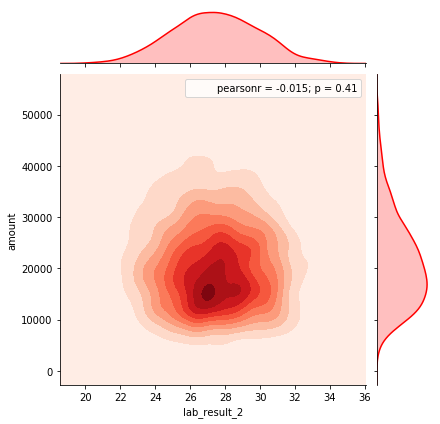

In [79]:
sns.jointplot('lab_result_2', 'amount', data=merged_or, kind = 'kde', cmap="Reds", color = 'r')

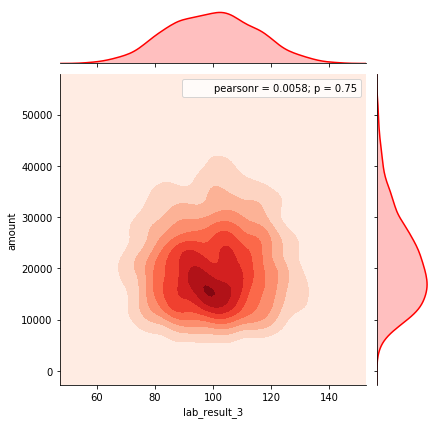

In [73]:
sns.jointplot('lab_result_3', 'amount', data=merged_or, kind = 'kde', cmap="Reds", color = 'r')

From the three continuous variables analysed, we observed that the kdeplots for these 6 variables do not show much linear relationship with the exception of age. This is corroborated by the pearsonr score for age, which has the largest absolute value amongst the variables. 

# Bivariate Data Analysis - Medical History Availability, Preop medication & Symptom vs Cost

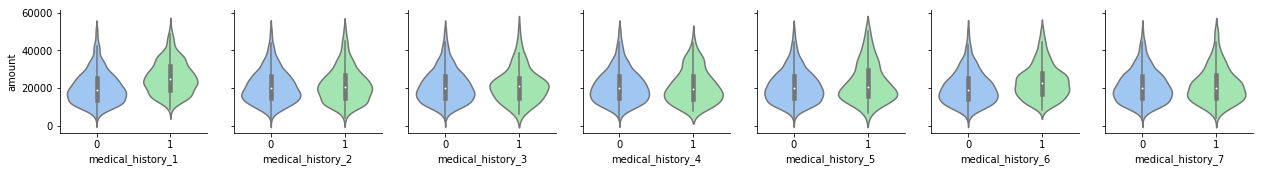

In [74]:
g = sns.PairGrid(x_vars=["medical_history_1", "medical_history_2", "medical_history_3", "medical_history_4", "medical_history_5",
                        "medical_history_6", "medical_history_7"],
                 y_vars=["amount"], data = merged_or)
g.map(sns.violinplot, palette="pastel")

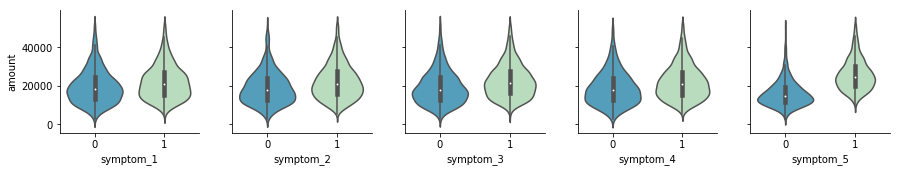

In [75]:
g = sns.PairGrid(x_vars=["symptom_1", "symptom_2", "symptom_3", "symptom_4", "symptom_5"], 
                 y_vars=["amount"], data = merged_or)
g.map(sns.violinplot, palette="GnBu_r")

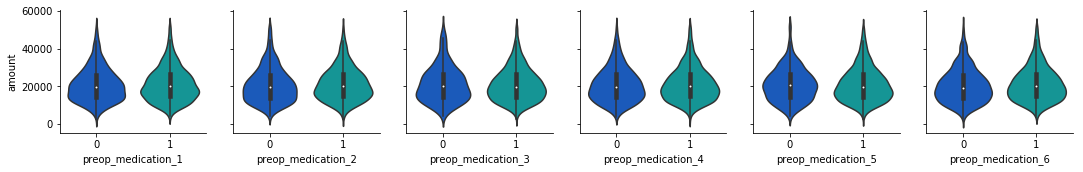

In [76]:
g = sns.PairGrid(x_vars=["preop_medication_1", "preop_medication_2", "preop_medication_3", "preop_medication_4", "preop_medication_5", "preop_medication_6"], 
                 y_vars=["amount"], data = merged_or)
g.map(sns.violinplot, palette="winter")

From the three categorical variables analyzed, most of the violin plots don't show much differences between the absent (0) and present (1) group except for symptom_5, medical_history_1 and medical_history 6. 

# Bivariate data analysis - Number of pre-op medication prescribed, medical history and symptom against cost

Text(0.5,0,'Number of Medication Prescribed')

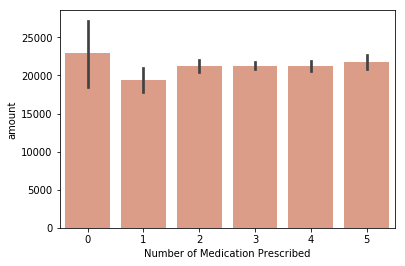

In [77]:
sns.barplot('N_Med', 'amount', data=merged_or, color="darksalmon")
plt.xlabel('Number of Medication Prescribed')

Text(0.5,0,'Number of Symptoms Present')

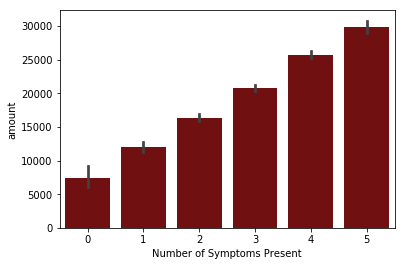

In [80]:
sns.barplot('N_Symp', 'amount', data=merged_or, color="maroon")
plt.xlabel('Number of Symptoms Present')

Text(0.5,0,'Number of Medical History Present')

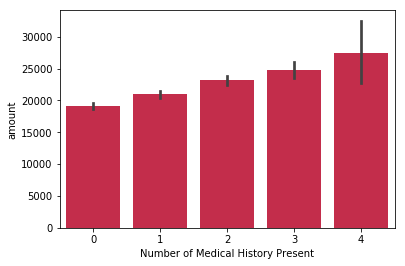

In [81]:
sns.barplot('N_Hist', 'amount', data=merged_or, color="crimson")
plt.xlabel('Number of Medical History Present')

Analysis on the engineered features show that the number of medical history present and symptoms present have a positive correlation with cost. Interestingly, number of medications prescribed does not seem to be correlated to cost.  

Checking for skew and kurtosis for numerical variables. 

In [82]:
merged_or.skew()

medical_history_1     1.827054
medical_history_2     0.939161
medical_history_3     5.083003
medical_history_4     4.031701
medical_history_5     3.747306
medical_history_6     1.171648
medical_history_7     1.117444
preop_medication_1   -0.000682
preop_medication_2   -0.356650
preop_medication_3   -1.652651
preop_medication_4   -0.078465
preop_medication_5   -1.673636
preop_medication_6   -1.091033
symptom_1            -0.481766
symptom_2            -0.661323
symptom_3            -0.180032
symptom_4            -0.993312
symptom_5            -0.085300
lab_result_1         -0.022742
lab_result_2         -0.004279
lab_result_3          0.016645
Year                  0.080438
Age                   0.250304
Inpatient_D           0.018023
BMI                   0.079351
N_Hist                0.516904
N_Med                -0.237621
N_Symp               -0.168761
amount                0.749955
dtype: float64

In [83]:
merged_or.kurtosis()

medical_history_1      1.339037
medical_history_2     -1.118739
medical_history_3     23.853174
medical_history_4     14.264335
medical_history_5     12.050516
medical_history_6     -0.627670
medical_history_7     -0.751831
preop_medication_1    -2.001364
preop_medication_2    -1.874078
preop_medication_3     0.731755
preop_medication_4    -1.995203
preop_medication_5     0.801604
preop_medication_6    -0.810200
symptom_1             -1.769107
symptom_2             -1.563718
symptom_3             -1.968931
symptom_4             -1.014022
symptom_5             -1.994083
lab_result_1          -0.489897
lab_result_2          -0.286485
lab_result_3          -0.367245
Year                  -1.295229
Age                   -1.113312
Inpatient_D           -0.419862
BMI                   -0.156512
N_Hist                -0.354818
N_Med                 -0.259810
N_Symp                -0.337746
amount                 0.381825
dtype: float64

# Multivariate Analysis: Year-on-Year Cost Analysis 
One factor to consider for the cost of care is the general increase in cost of care each year. Hence, we conduct an analysis on the indicator categorical variables, medical_history, preop_medication and symptom.

For example, if the price of preop_medication_1 increases each year, we would expect an increasing trend to be observed for patients who were prescribed preop_medication_1 as the year goes by. For symptoms and medical_history, this could mean that the prices of drugs/treatments associated with the symptom or medical history to increase with each year. 

In [84]:
merged.Year.value_counts()

2011    670
2012    609
2013    602
2014    573
2015    546
Name: Year, dtype: int64

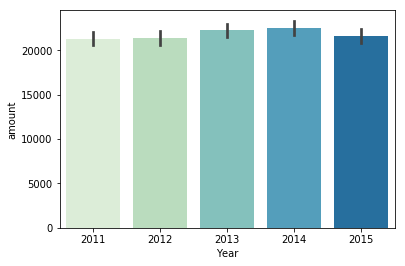

In [85]:
sns.barplot(x="Year", y="amount", data=merged, palette="GnBu")

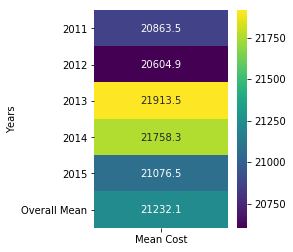

In [86]:
u_2011 = merged_or[merged_or.Year == 2011 ].amount.mean()
u_2012 = merged_or[merged_or.Year == 2012].amount.mean()
u_2013 = merged_or[merged_or.Year == 2013].amount.mean()
u_2014 = merged_or[merged_or.Year == 2014].amount.mean()
u_2015 = merged_or[merged_or.Year == 2015].amount.mean()
u_mean = merged_or.amount.mean()

index_labels = ['2011', '2012', '2013', '2014', '2015', 'Overall Mean']
means = [u_2011, u_2012, u_2013, u_2014, u_2015, u_mean ]
years_m = list(zip(index_labels, means))

YM = pd.DataFrame.from_records(years_m, columns = ['Years', 'Mean Cost']).set_index('Years').round(2)
fig, ax = plt.subplots(figsize = (3, 4))
sns.heatmap(YM, annot = True, fmt = 'g', cmap = 'viridis')

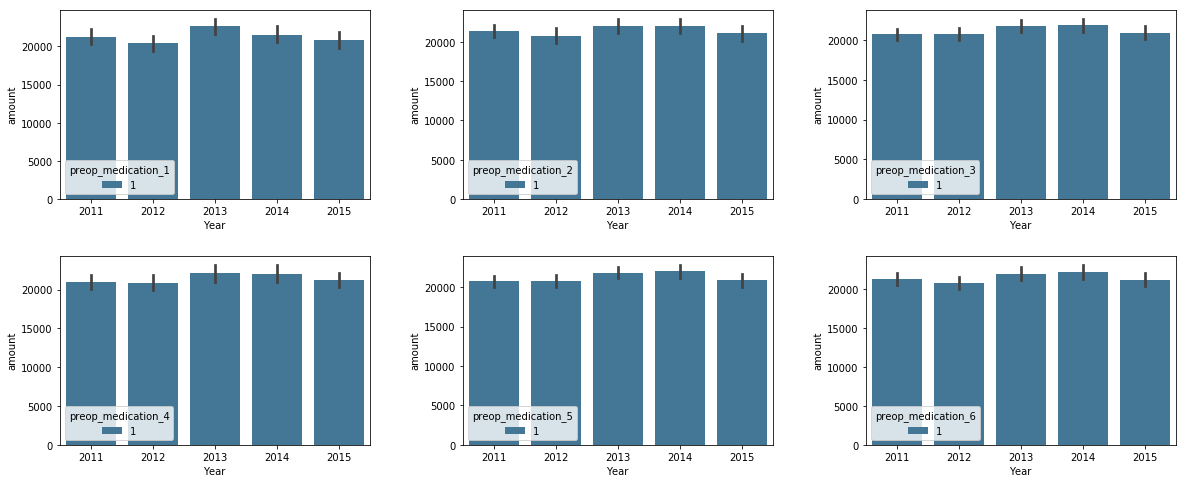

In [87]:
fig, ax = plt.subplots(figsize = (20, 8))

ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))
ax6 = plt.subplot2grid((2, 3), (1, 2))

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

sns.barplot(x="Year", y="amount", hue="preop_medication_1", data=merged_or[merged_or.preop_medication_1 == 1], palette="mako", ax = ax1)
sns.barplot(x="Year", y="amount", hue="preop_medication_2", data=merged_or[merged_or.preop_medication_2 == 1], palette="mako", ax = ax2)
sns.barplot(x="Year", y="amount", hue="preop_medication_3", data=merged_or[merged_or.preop_medication_3 == 1], palette="mako", ax = ax3)
sns.barplot(x="Year", y="amount", hue="preop_medication_4", data=merged_or[merged_or.preop_medication_4 == 1], palette="mako", ax = ax4)
sns.barplot(x="Year", y="amount", hue="preop_medication_5", data=merged_or[merged_or.preop_medication_5 == 1], palette="mako", ax = ax5)
sns.barplot(x="Year", y="amount", hue="preop_medication_6", data=merged_or[merged_or.preop_medication_6 == 1], palette="mako", ax = ax6)

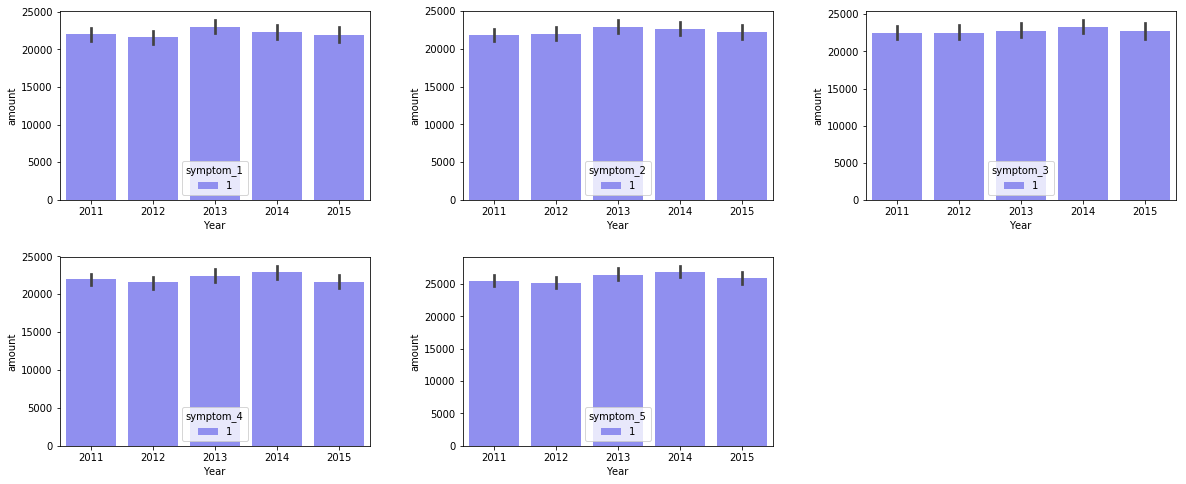

In [88]:
fig, ax = plt.subplots(figsize = (20, 8))

ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

sns.barplot(x="Year", y="amount", hue="symptom_1", data=merged_or[merged_or.symptom_1 == 1], palette="cool", ax = ax1)
sns.barplot(x="Year", y="amount", hue="symptom_2", data=merged_or[merged_or.symptom_2 == 1], palette="cool", ax = ax2)
sns.barplot(x="Year", y="amount", hue="symptom_3", data=merged_or[merged_or.symptom_3 == 1], palette="cool", ax = ax3)
sns.barplot(x="Year", y="amount", hue="symptom_4", data=merged_or[merged_or.symptom_4 == 1], palette="cool", ax = ax4)
sns.barplot(x="Year", y="amount", hue="symptom_5", data=merged_or[merged_or.symptom_5 == 1], palette="cool", ax = ax5)

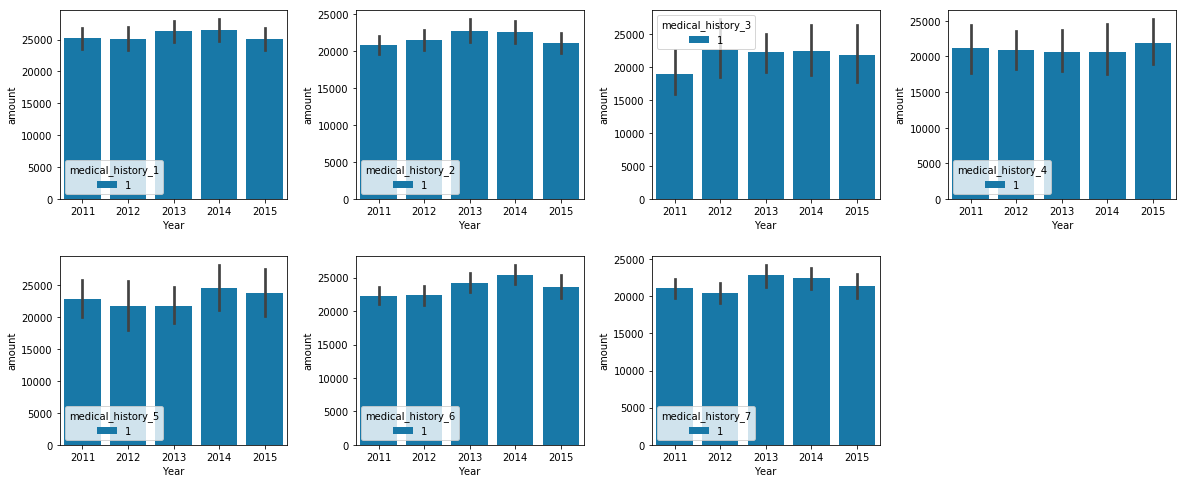

In [89]:
fig, ax = plt.subplots(figsize = (20, 8))

ax1 = plt.subplot2grid((2, 4), (0, 0))
ax2 = plt.subplot2grid((2, 4), (0, 1))
ax3 = plt.subplot2grid((2, 4), (0, 2))
ax4 = plt.subplot2grid((2, 4), (0, 3))
ax5 = plt.subplot2grid((2, 4), (1, 0))
ax6 = plt.subplot2grid((2, 4), (1, 1))
ax7 = plt.subplot2grid((2, 4), (1, 2))

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

sns.barplot(x="Year", y="amount", hue="medical_history_1", data=merged_or[merged_or.medical_history_1 == 1], palette="winter", ax = ax1)
sns.barplot(x="Year", y="amount", hue="medical_history_2", data=merged_or[merged_or.medical_history_2 == 1], palette="winter", ax = ax2)
sns.barplot(x="Year", y="amount", hue="medical_history_3", data=merged_or[merged_or.medical_history_3 == 1], palette="winter", ax = ax3)
sns.barplot(x="Year", y="amount", hue="medical_history_4", data=merged_or[merged_or.medical_history_4 == 1], palette="winter", ax = ax4)
sns.barplot(x="Year", y="amount", hue="medical_history_5", data=merged_or[merged_or.medical_history_5 == 1], palette="winter", ax = ax5)
sns.barplot(x="Year", y="amount", hue="medical_history_6", data=merged_or[merged_or.medical_history_6 == 1], palette="winter", ax = ax6)
sns.barplot(x="Year", y="amount", hue="medical_history_7", data=merged_or[merged_or.medical_history_7 == 1], palette="winter", ax = ax7)

# Checking for correlation and potential multicollinearity 

In [91]:
Data = merged_or.reset_index().drop(['index', 'level_0'], axis =1)

In [92]:
to_encode = ['gender', 'race', 'resident_status', 'Year']
Data_encoded = pd.get_dummies(Data, columns = to_encode)

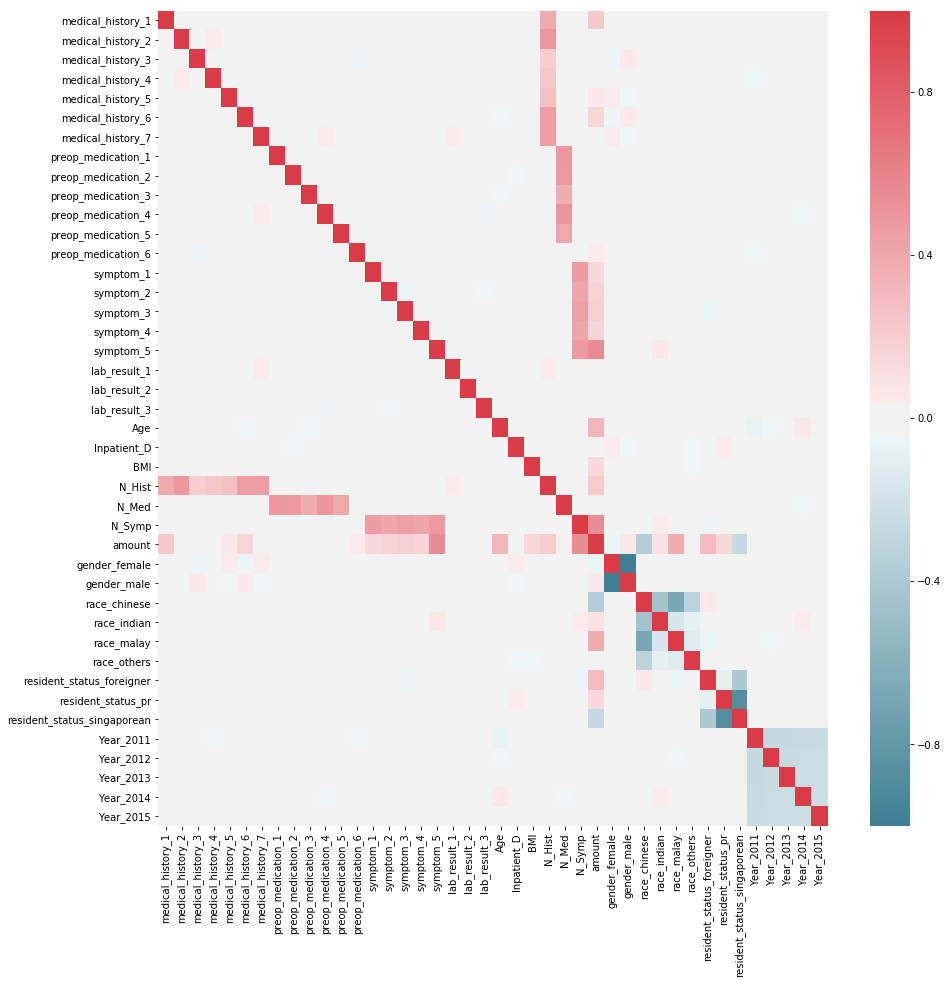

In [93]:
f, ax = plt.subplots(figsize=(15, 15))
corr = Data_encoded.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), ax = ax)

# Section 3. Random Forest Model Training

In [94]:
#Normalise numerical continuous variables
numer_list = ['Inpatient_D', 'BMI', 'N_Hist', 'N_Symp', 'Age', 'lab_result_1', 'lab_result_2', 'lab_result_3']

for key in numer_list: 
    col_mean = np.mean(Data_encoded[key])
    col_stdev = np.std(Data_encoded[key])
    Data_encoded[key] = Data_encoded[key].apply(lambda x: ((x - col_mean)/col_stdev))

In [95]:
#Generate predictor variable set (X) and response variable set (Y)
X = Data_encoded.drop('amount', axis =1)
X_ = X.as_matrix()
Y = Data_encoded.loc[:, 'amount'].astype('int64')

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [96]:
#Obtain the list of feature names for convenience
X_headers = list(X)

In [97]:
#Building the ExtraTreesRegressor model, with mean decrease in accuracy implementation. 
from sklearn.cross_validation import ShuffleSplit
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from collections import defaultdict

scores = defaultdict(list)
et_rgr = ExtraTreesRegressor()

for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
    X_train, X_test = X_[train_idx], X_[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    et_rgr = et_rgr.fit(X_, Y)
    acc = r2_score(Y_test, et_rgr.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, et_rgr.predict(X_t))
        scores[X_headers[i]].append((acc-shuff_acc)/acc)

In [98]:
feature_score = sorted([(round(np.mean(score), 4), feat) for feat, score in scores.items()], reverse=True)
fi = dict(feature_score)
stdev = [(np.std(score), feat) for feat, score in scores.items()]


# Print the feature ranking
print("Feature ranking:")
for f in range(X_.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_score[f][1] , feature_score[f][0]))

Feature ranking:
1. symptom_5 (0.449300)
2. race_malay (0.387600)
3. N_Symp (0.243800)
4. resident_status_foreigner (0.232900)
5. Age (0.219400)
6. medical_history_1 (0.122500)
7. medical_history_6 (0.045400)
8. race_indian (0.022500)
9. resident_status_singaporean (0.021800)
10. resident_status_pr (0.016500)
11. BMI (0.012600)
12. race_chinese (0.010200)
13. symptom_3 (0.005900)
14. N_Hist (0.004100)
15. symptom_2 (0.003500)
16. medical_history_7 (0.002700)
17. symptom_4 (0.002600)
18. symptom_1 (0.001800)
19. preop_medication_2 (0.001600)
20. preop_medication_1 (0.001600)
21. preop_medication_4 (0.001500)
22. Year_2014 (0.001300)
23. gender_male (0.001200)
24. gender_female (0.001200)
25. Inpatient_D (0.001200)
26. medical_history_2 (0.001100)
27. lab_result_3 (0.001100)
28. lab_result_1 (0.001100)
29. Year_2013 (0.001100)
30. preop_medication_5 (0.001000)
31. lab_result_2 (0.001000)
32. Year_2011 (0.001000)
33. N_Med (0.001000)
34. Year_2012 (0.000900)
35. medical_history_5 (0.00080

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

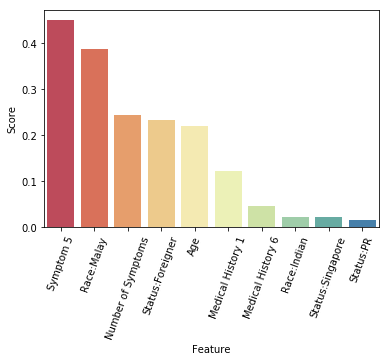

In [103]:
# Plot the feature importances of the forest by rank
df = pd.DataFrame.from_records(list(feature_score), columns = ['Score', 'Feature'])
df.Feature = ['Symptom 5','Race:Malay','Number of Symptoms', 'Status:Foreigner', 'Age',
              'Medical History 1', 'Medical History 6', 'Race:Indian',  'Status:Singapore',
              'Status:PR', 'BMI', 'Race:Chinese', 'Symptom 3', 'Number of History', 'Symptom 2', 
              'Medical History 7', 'Symptom 4','Symptom 1','Preop Med 2', 'Preop Med 1',
              'Preop Med 4', 'Year:2014','Male', 'Female', 'Inpatient Duration', 'Medical History 2',
              'Lab Result 3','Lab Result 1','Year:201', 'Preop Med 5','Lab Result 2','Year:2011',
              'Number of Meds', 'Year:2012', 'Medical History 5', 'Year:2015','Preop Med 6',
              'Preop Med 3','Race:Others', 'Medical History 4', 'Medical History 3']
sns.barplot(x = 'Feature', y ='Score', data = df.iloc[:10,:], palette = 'Spectral')
plt.xticks(rotation = 70)

Analysis and discussion on the features identified from this feature selection strategy will be further discussed in the report. 